In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing  import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/thyroid-disease-data/Thyroid_Diff.csv")

In [6]:
df.nunique()


Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
T                        7
N                        3
M                        2
Stage                    5
Response                 4
Recurred                 2
dtype: int64

In [12]:
df["Physical Examination"][5]

'Multinodular goiter'

In [7]:
df.sample(3)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
182,45,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Biochemical Incomplete,No
172,31,M,Yes,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [16]:
one_hot=OneHotEncoder(sparse_output=False)
one=one_hot.fit_transform(df[["Gender","Smoking","Hx Smoking","Hx Radiothreapy","Thyroid Function","Physical Examination","Adenopathy","Pathology","Focality","Risk","T","N","M","Stage","Response"]])
one=pd.DataFrame(one,columns=one_hot.get_feature_names_out())


In [19]:
one["Age"]=df["Age"]
Y=df[["Recurred"]]

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(one,Y,test_size=0.2,random_state=42)

In [23]:
random_classif=RandomForestClassifier()
random_classif.fit(X_train,Y_train)

/tmp/ipykernel_33/3573291835.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_classif.fit(X_train,Y_train)


RandomForestClassifier()

In [24]:
random_classif.score(X_test,Y_test)

0.987012987012987

In [25]:
y_pred=random_classif.predict(X_test)

In [26]:
y_pred

array(['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No'], dtype=object)

In [27]:
Y_test

,Recurred
268,No
250,No
318,Yes
331,Yes
56,No
...,...
104,No
167,No
63,No
233,Yes


In [30]:
label_encoder=LabelEncoder()
p=label_encoder.fit_transform(y_pred)
y=label_encoder.fit_transform(Y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


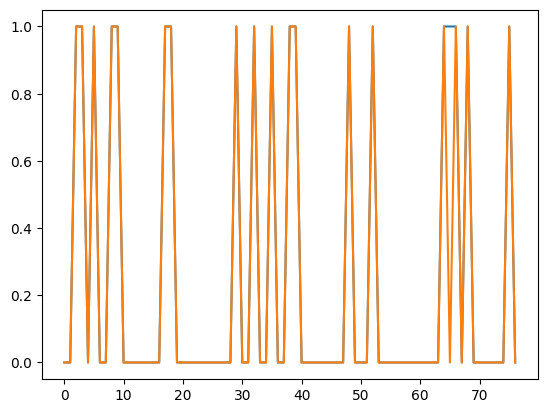

In [33]:
plt.plot(y)
plt.plot(p)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


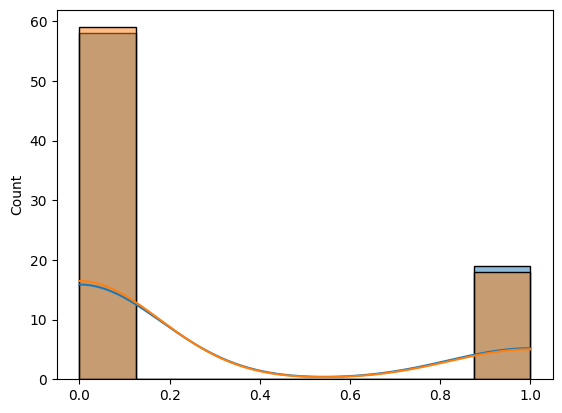

In [42]:
sns.histplot(y,kde=True)
sns.histplot(p,kde=True)
plt.show()

<Axes: >

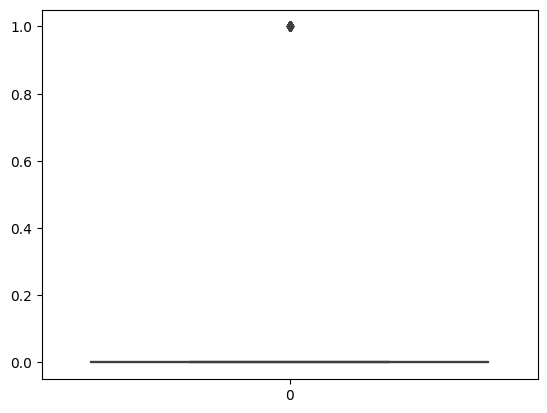

In [48]:
sns.boxplot(y)
sns.boxplot(p)

<Axes: >

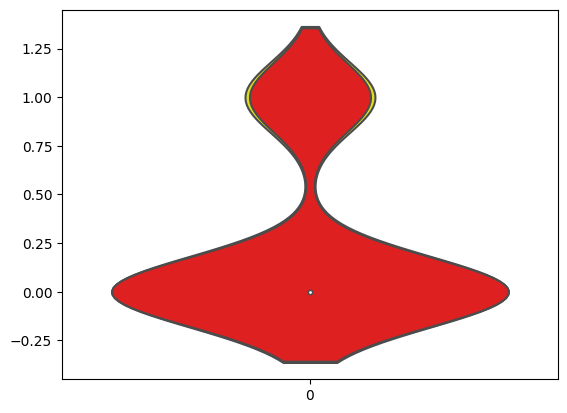

In [52]:
sns.violinplot(y,color="yellow")
sns.violinplot(p,color='red')

<Axes: >

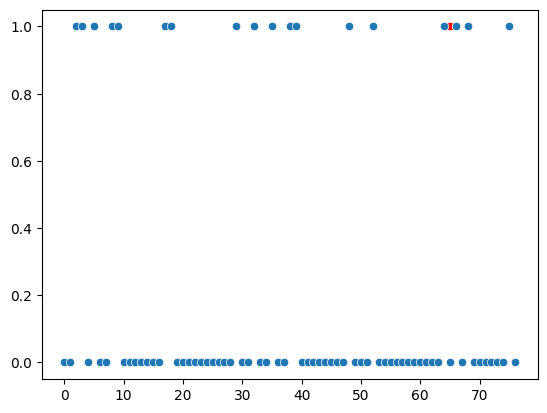

In [56]:
sns.scatterplot(y,color="red")
sns.scatterplot(p)